<a href="https://colab.research.google.com/github/hellomada/RayField-Systems-Internship-Week-2/blob/notebooks/ai_module.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ai_model_dev.ipynb

"""
# Day 1 – ML Problem Setup & First Model

## Problem Statement
We aim to **forecast AC power output** (`ac_power`) for a solar plant using features such as hour of day, direct current power, and energy yields.

### Input Features:
- `hour`
- `dc_power`
- `daily_yield`
- `total_yield`

### Target Output:
- `ac_power`

## Baseline Model: Linear Regression
"""

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, VotingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load and prepare data
df = pd.read_csv("cleaned_data.csv")
df = df.dropna()

# Feature/Target selection
X = df[['hour', 'dc_power', 'daily_yield', 'total_yield']]
y = df['ac_power']




In [4]:
# Split data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline: Linear Regression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

lr_preds = lr_model.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_r2 = r2_score(y_test, lr_preds)

print("Linear Regression")
print(f"MSE: {lr_mse:.3f}, R²: {lr_r2:.4f}\n")

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train, y_train)

rf_preds = rf_model.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print("Random Forest")
print(f"MSE: {rf_mse:.3f}, R²: {rf_r2:.4f}\n")



Linear Regression
MSE: 0.832, R²: 1.0000

Random Forest
MSE: 0.153, R²: 1.0000



In [5]:
# Ensemble Regressors
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(x_train, y_train)

adr = AdaBoostRegressor(n_estimators=100, random_state=42)
adr.fit(x_train, y_train)

lr2 = LinearRegression()
lr2.fit(x_train, y_train)

ensemble = VotingRegressor([
    ("GBR", gbr),
    ("RFR", rf_model),
    ("ADR", adr),
    ("LR", lr2)
])
ensemble.fit(x_train, y_train)

ensemble_preds = ensemble.predict(x_test)
ensemble_mse = mean_squared_error(y_test, ensemble_preds)
ensemble_r2 = r2_score(y_test, ensemble_preds)

print("Ensemble Regressor")
print(f"MSE: {ensemble_mse:.3f}, R²: {ensemble_r2:.4f}")


Ensemble Regressor
MSE: 19.327, R²: 0.9999


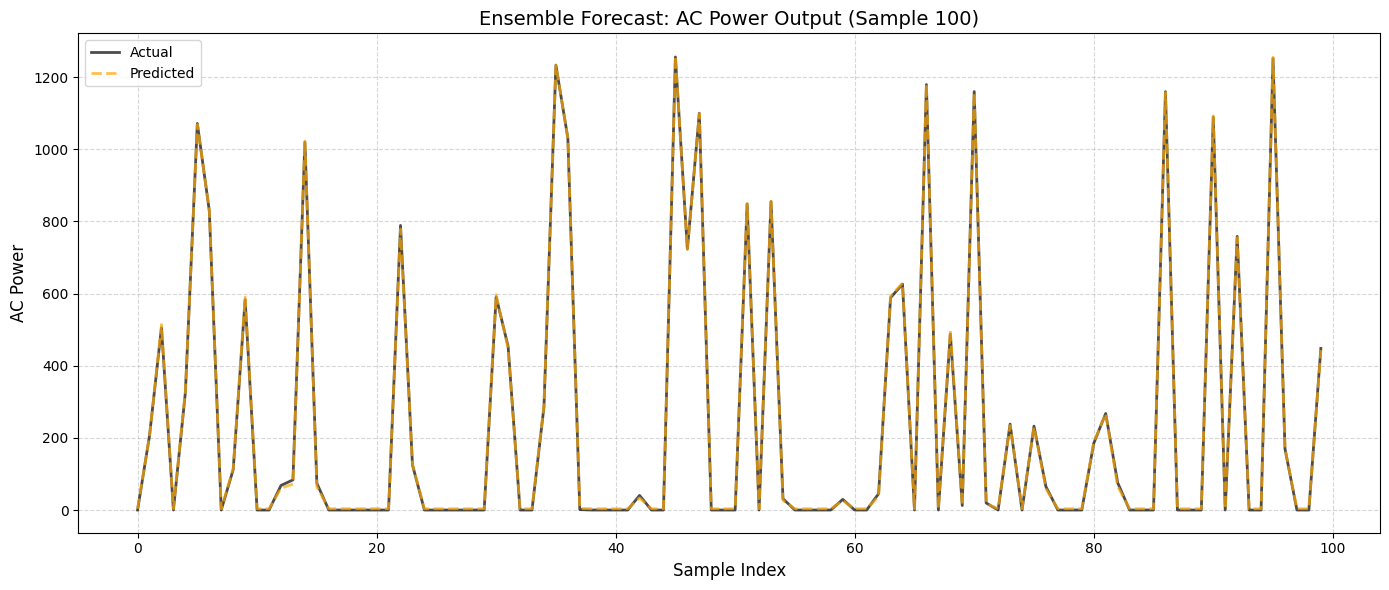

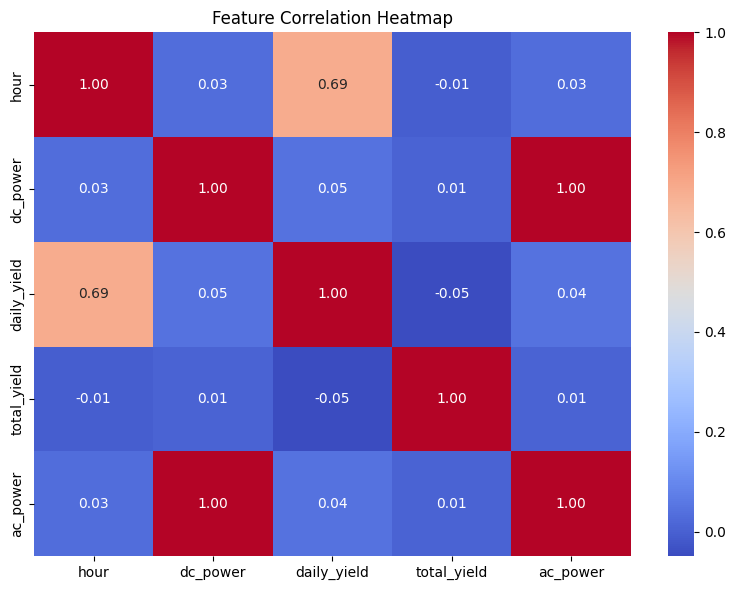

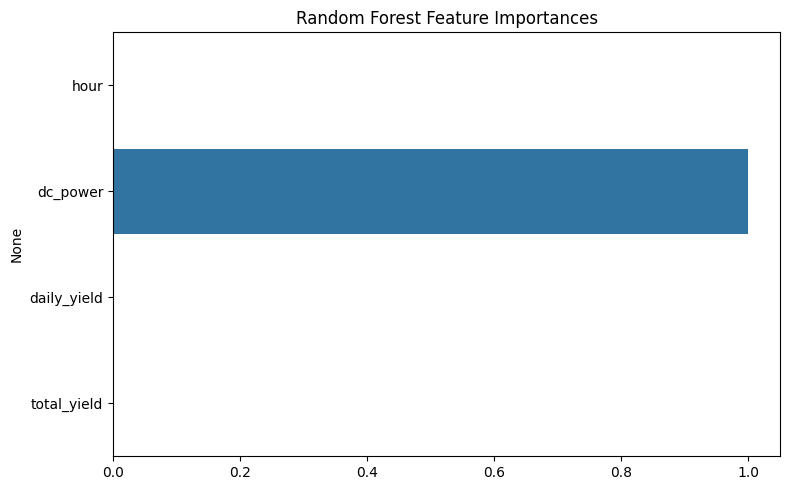

In [10]:
import seaborn as sns
# Save predictions
pred_df = x_test.copy()
pred_df['actual'] = y_test.values
pred_df['predicted'] = ensemble_preds
pred_df.to_csv("predictions.csv", index=False)

# Better plot: Overlayed line with transparency and color tweaks
plt.figure(figsize=(14, 6))
plt.plot(pred_df['actual'].values[:100], label='Actual', color='black', linewidth=2, alpha=0.7)
plt.plot(pred_df['predicted'].values[:100], label='Predicted', color='orange', linewidth=2, linestyle='--', alpha=0.7)
plt.title("Ensemble Forecast: AC Power Output (Sample 100)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("AC Power", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig("diagrams/output_forecast_plot.png")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['hour', 'dc_power', 'daily_yield', 'total_yield', 'ac_power']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("diagrams/feature_correlation_heatmap.png")
plt.show()

# Feature importance (Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Random Forest Feature Importances")
plt.tight_layout()
plt.savefig("diagrams/feature_importances.png")
plt.show()

In [11]:
import joblib

# Save trained ensemble model
joblib.dump(ensemble, "ensemble_model.pkl")
print("Saved ensemble model to ensemble_model.pkl")


Saved ensemble model to ensemble_model.pkl
